# Connecting Jupyter Notebook to SQL Server

In [1]:
import pyodbc
import pandas as pd
import numpy as np

conn = pyodbc.connect(
    "Driver={ODBC Driver 17 for SQL Server};"
    "Server=CLOUDCRUSH;"
    "Database=zomato;"
    "Trusted_Connection=yes;"
    "Encrypt=no;"
)

In [2]:
df = pd.read_sql("SELECT * FROM [dbo].[zomato]", conn)

C:\Users\adity\AppData\Local\Temp\ipykernel_21184\760284537.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM [dbo].[zomato]", conn)


In [3]:
df = df.replace(["", " ", "None", "null"], np.nan)




# Exploratory Data Analysis - EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   address                     51717 non-null  object 
 1   name                        51717 non-null  object 
 2   online_order                51717 non-null  bool   
 3   book_table                  51717 non-null  bool   
 4   rate                        51717 non-null  object 
 5   votes                       51717 non-null  int64  
 6   phone                       50509 non-null  object 
 7   location                    51696 non-null  object 
 8   rest_type                   51490 non-null  object 
 9   dish_liked                  23639 non-null  object 
 10  cuisines                    51672 non-null  object 
 11  approx_cost_for_two_people  51371 non-null  float64
 12  reviews_list                51717 non-null  object 
 13  menu_item                   517

In [5]:
df.describe()

,votes,approx_cost_for_two_people
count,51717.000000,51371.000000
mean,283.697527,555.431566
std,803.838853,438.850728
min,0.000000,40.000000
25%,7.000000,300.000000
50%,41.000000,400.000000
75%,198.000000,650.000000
max,16832.000000,6000.000000


In [5]:
df.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                              0
votes                             0
phone                          1208
location                         21
rest_type                       227
dish_liked                    28078
cuisines                         45
approx_cost_for_two_people      346
reviews_list                      0
menu_item                         0
listed_in_type                    0
listed_in_city                    0
dtype: int64

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(51677, 16)

In [8]:
df.head(5)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost_for_two_people,reviews_list,menu_item,listed_in_type,listed_in_city
0,"77, Near Ayyapa Temple, Hosur Main Road, Madiw...",New Grand Restaurant,True,False,3.1 /5,11,080 25524411\n080 25525726,BTM,Casual Dining,None,"North Indian, South Indian, Biryani",500.0,"[('Rated 1.0', 'RATED\n Servers will not at a...",[],Dine-out,Koramangala 6th Block
1,"8, G Cross, 20th Main Road, BTM 1st stage, BTM...",Chillout,True,False,0,0,+91 7012057119,BTM,Cafe,None,"Burger, Cafe, Pizza, Beverages",200.0,[],[],Dine-out,Koramangala 6th Block
2,"1A/3, GR Residency, 14th Cross, 20th Main, Ven...",HungerLoft,True,False,2.5 /5,109,+91 9597450021,BTM,Casual Dining,None,"North Indian, Chinese, Arabian",800.0,"[('Rated 1.0', 'RATED\n the shawarma combo wa...",[],Dine-out,Koramangala 6th Block
3,"6, Sapthagiri Complex, 1st Main Road, Venkites...",Zafron Cafe,False,False,0,0,+91 6282431710\n+91 7012086487,Marathahalli,Quick Bites,None,"Beverages, Fast Food",300.0,"[('Rated 4.0', 'RATED\n Zafron Cafe is small ...",[],Dine-out,Koramangala 6th Block
4,"Yahoo Building Basement, Yahoo Backside Road, ...",Origin Espresso Bar,False,False,0,0,None,Domlur,Cafe,None,Cafe,NaN,"[('Rated 4.0', 'RATED\n Nice place. The staff...",[],Dine-out,Koramangala 6th Block


In [9]:
df.head()
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
Index: 51677 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   address                     51677 non-null  object 
 1   name                        51677 non-null  object 
 2   online_order                51677 non-null  bool   
 3   book_table                  51677 non-null  bool   
 4   rate                        51677 non-null  object 
 5   votes                       51677 non-null  int64  
 6   phone                       50470 non-null  object 
 7   location                    51656 non-null  object 
 8   rest_type                   51450 non-null  object 
 9   dish_liked                  23628 non-null  object 
 10  cuisines                    51632 non-null  object 
 11  approx_cost_for_two_people  51332 non-null  float64
 12  reviews_list                51677 non-null  object 
 13  menu_item                   51677 no

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost_for_two_people', 'reviews_list', 'menu_item',
       'listed_in_type', 'listed_in_city'],
      dtype='object')

In [10]:
df['address'] = df['address'].astype(str).str.strip()

In [11]:
df['name'] = df['name'].astype(str).str.strip()

In [12]:
df['rate'] = df['rate'].astype(str)


In [13]:
df['rate'] = df['rate'].replace(['NEW', '-', '0'], None)


In [14]:
df['rate'] = df['rate'].str.replace('/5', '',regex=False)


In [15]:

df['online_order'] = df['online_order'].map({True: 1, False: 0})


In [16]:
df['book_table'] = df['book_table'].map({True: 1, False: 0})

In [17]:
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')


In [18]:
df['phone'] = df['phone'].astype(str)

# replace newline with comma
df['phone'] = df['phone'].str.replace('\n', ', ', regex=False)

# remove extra quotes
df['phone'] = df['phone'].str.replace('"', '', regex=False)

# remove leading/trailing spaces
df['phone'] = df['phone'].str.strip()

# replace empty strings or 'nan' with NaN
df['phone'] = df['phone'].replace(['', 'nan', 'None'], pd.NA)


In [19]:
df['rest_type'] = df['rest_type'].astype(str).str.strip().str.title()

In [20]:
df['rest_type'] = df['rest_type'].replace(['','Nan','None'],pd.NA)

In [21]:
df['dish_liked'] = df['dish_liked'].astype(str).str.strip()

In [22]:
df['dish_liked'] = df['dish_liked'].replace(['','nan','None'],np.nan)

In [23]:
df['dish_liked'] = df['dish_liked'].str.split(", ")

In [24]:
df['location'] = df['location'].astype(str).str.strip()

In [25]:
df['location'] = df['location'].str.title()

In [26]:
text_cols = ['address', 'name', 'location', 'rest_type', 'dish_liked', 'cuisines']

for col in text_cols:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].str.replace('\s+', ' ', regex=True)   # remove extra spaces


In [27]:
df = df[df.isnull().sum(axis=1) < 6]


In [28]:
df = df.drop(columns=['reviews_list'])

In [29]:
df= df.drop(columns=['menu_item'])

In [30]:
df['cuisines'] = df['cuisines'].astype(str).str.strip()


In [31]:
df['cuisines'] = df['cuisines'].replace(['nan', 'None', '0'], pd.NA)


In [32]:
df['cuisines'] = df['cuisines'].str.replace(", ",",")
df['cuisines'] = df['cuisines'].str.replace(" ,",",")
df['cuisines'] = df['cuisines'].str.replace(" , ",",")

In [33]:
df['cuisines_list'] = df['cuisines'].str.split(',')

In [34]:
df.rename(columns={
    'listed_in_type': 'listed_type',
    'listed_in_city': 'listed_city'
}, inplace=True)


In [35]:
df['listed_type'] = df['listed_type'].astype(str).str.strip()

In [36]:
df.rename(columns={'approx_cost_for_two_people' : 'cost_for_two'},inplace=True)

In [37]:
df['cost_for_two'] = (
    df['cost_for_two']
    .astype(str)
    .str.replace(',', '', regex=True)
    .replace(['nan', '-', ''], None)
)

df['cost_for_two'] = pd.to_numeric(df['cost_for_two'], errors='coerce')

median_cost = df['cost_for_two'].median()
df['cost_for_two'].fillna(median_cost, inplace=True)



C:\Users\adity\AppData\Local\Temp\ipykernel_21184\1505739786.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cost_for_two'].fillna(median_cost, inplace=True)


In [38]:
df.isnull().sum()

address              0
name                 0
online_order         0
book_table           0
rate             10037
votes                0
phone             1207
location             0
rest_type            0
dish_liked           0
cuisines            45
cost_for_two         0
listed_type          0
listed_city          0
cuisines_list       45
dtype: int64

In [39]:
df['phone'] = df['phone'].fillna('Unknown')
df.loc[:, 'phone'] = df['phone'].astype(str)

In [40]:
df['dish_liked'] = df['dish_liked'].fillna('Unknown')
df.loc[:, 'dish_liked'] = df['dish_liked'].astype(str)

In [41]:
df['cuisines_list'] = df['cuisines_list'].fillna('Unknown')
df.loc[:, 'cuisines_list'] = df['cuisines_list'].astype(str)

In [42]:
df['cuisines'] = df['cuisines'].fillna('Unknown')
df.loc[:, 'cuisines'] = df['cuisines'].astype(str)

In [43]:
df['rate'] = df['rate'].fillna('None')
df.loc[:, 'rate'] = df['rate'].astype(str)

In [44]:
df.loc[:, 'rate'] = pd.to_numeric(df['rate'], errors='coerce')


In [45]:
df['dish_liked'] = df['dish_liked'].astype(str)
df['cuisines_list'] = df['cuisines_list'].astype(str)
df.loc[:, 'dish_liked'] = df['dish_liked'].astype(str)
df.loc[:, 'cuisines_list'] = df['cuisines_list'].astype(str)


df.duplicated().sum()


np.int64(36)

In [46]:
df = df.drop_duplicates()

In [47]:
df.duplicated().sum()

np.int64(0)

In [48]:
df.dtypes

address           object
name              object
online_order       int64
book_table         int64
rate              object
votes              int64
phone             object
location          object
rest_type         object
dish_liked        object
cuisines          object
cost_for_two     float64
listed_type       object
listed_city       object
cuisines_list     object
dtype: object


# Data Visualizaion Summery


### Online Availability - Pie Chart

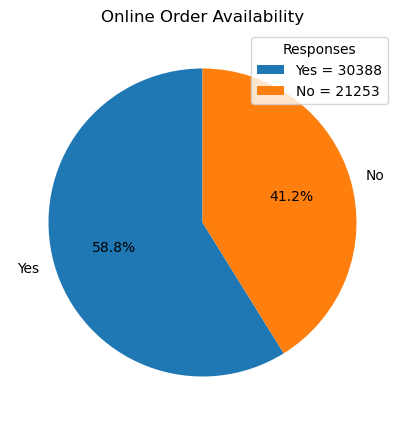

In [49]:
import matplotlib.pyplot as plt

online_order_counts = df['online_order'].value_counts()
plt.figure(figsize=(6,5))
plt.pie(online_order_counts, labels=['Yes','No'], autopct='%1.1f%%', startangle=90)
plt.legend([f"Yes = {online_order_counts.get(1,0)}", 
            f"No = {online_order_counts.get(0,0)}"], title="Responses")

plt.title("Online Order Availability")
plt.show()


### Distribution Cost for Two - Histogram

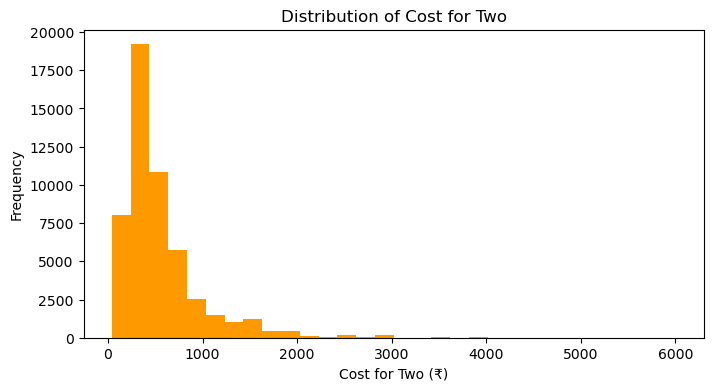

In [59]:
plt.figure(figsize=(8,4))
plt.hist(df['cost_for_two'], bins=30, color=plt.cm.autumn(0.6))
plt.title("Distribution of Cost for Two")
plt.xlabel("Cost for Two (₹)")
plt.ylabel("Frequency")
plt.show()



### Top 10 Cuisines

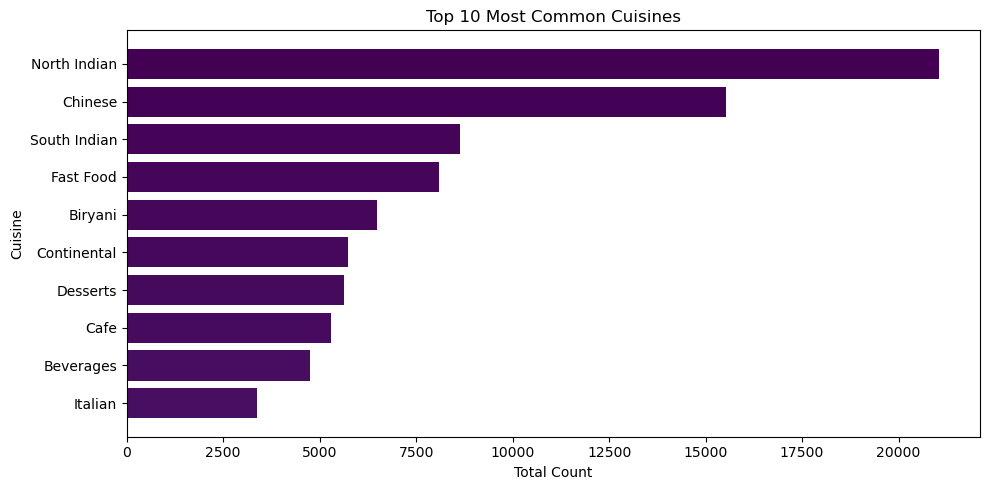

In [61]:
cuisine_counts = df['cuisines'].str.split(',').explode().str.strip().value_counts().head(10)

plt.figure(figsize=(10,5))


colors = plt.cm.viridis(range(10))

plt.barh(cuisine_counts.index, cuisine_counts.values, color=colors)

plt.gca().invert_yaxis()  
plt.title("Top 10 Most Common Cuisines")
plt.xlabel("Total Count")
plt.ylabel("Cuisine")

plt.tight_layout()
plt.show()


### Vote Distribution

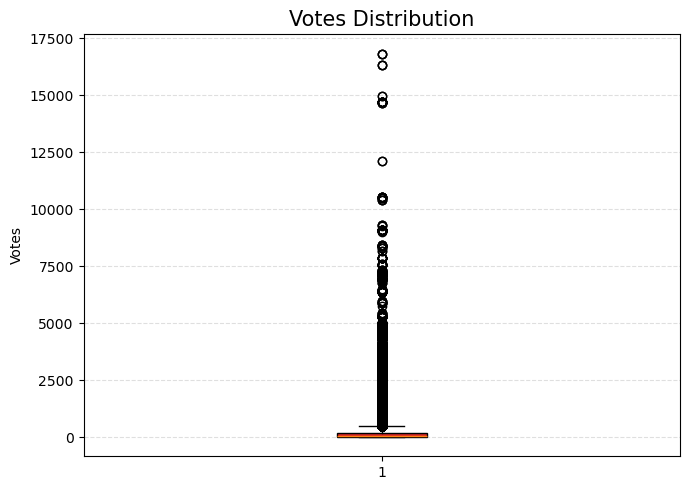

In [62]:
plt.figure(figsize=(7,5))

plt.boxplot(df['votes'],vert=True,patch_artist=True,boxprops=dict(facecolor=plt.cm.tab10(3)
                                                                 ))

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.title("Votes Distribution", fontsize=15)
plt.ylabel("Votes")

plt.tight_layout()
plt.show()


### Highest Rated Restraurant

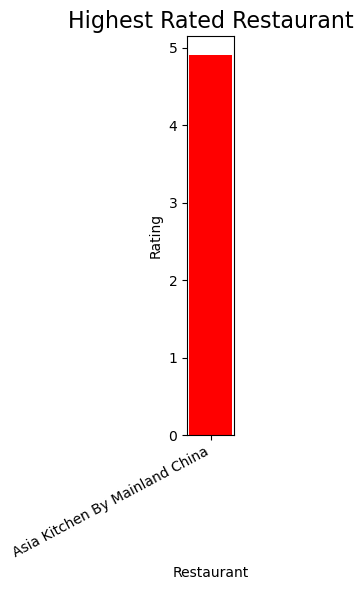

In [63]:
import matplotlib.pyplot as plt

df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

top_rated = df.sort_values(by='rate', ascending=False).head(1)

plt.figure(figsize=(2,6))


colors = plt.cm.autumn(range(1))      

plt.bar(top_rated['name'], top_rated['rate'], color=colors)

plt.title("Highest Rated Restaurant", fontsize=16)
plt.xlabel("Restaurant")
plt.ylabel("Rating")

plt.xticks(rotation=28, ha='right')



plt.tight_layout()
plt.show()


### Rating Distribution 

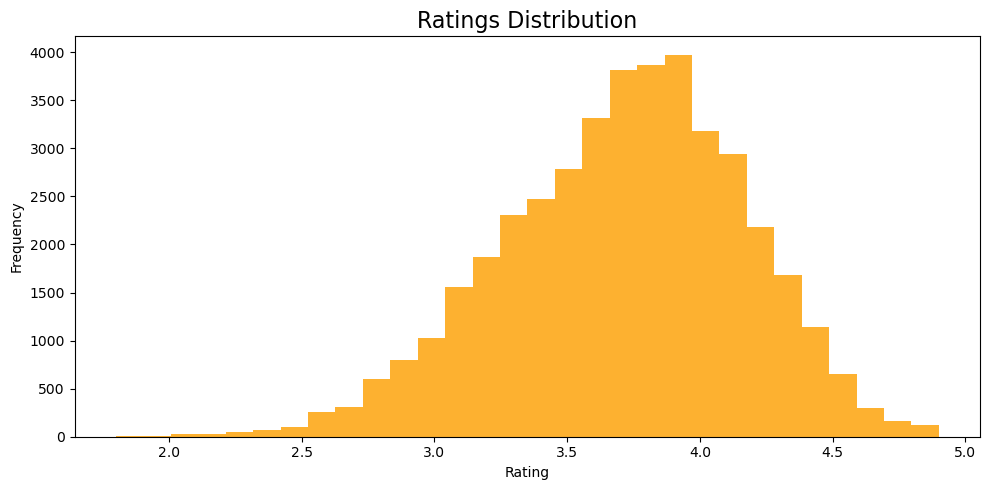

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
colors = plt.cm.plasma(np.linspace(0.2, 0.9, 30))   

plt.hist(df['rate'], bins=30, color=colors[-4])    
plt.title("Ratings Distribution", fontsize=16)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### Rating Distribution By Online Order Availability

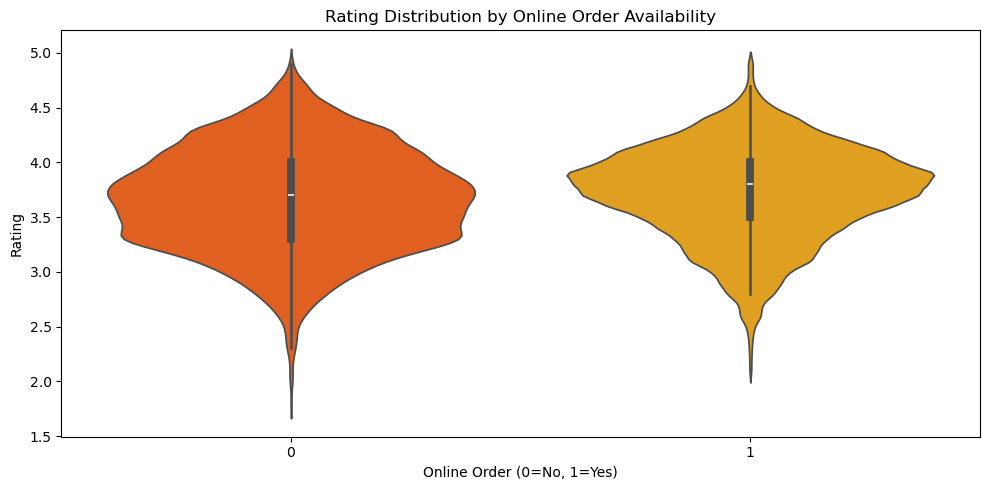

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.violinplot(
    data=df,
    x='online_order',
    y='rate',
    hue='online_order',    
    palette='autumn',
    legend=False
)
plt.title("Rating Distribution by Online Order Availability")
plt.xlabel("Online Order (0=No, 1=Yes)")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


### Cost VS Ratings

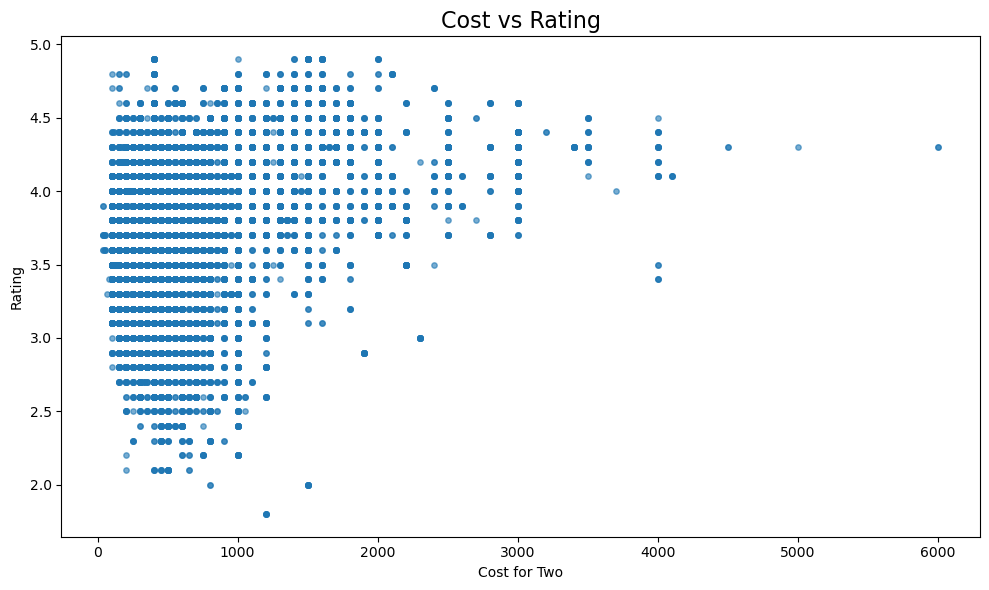

In [66]:
plt.figure(figsize=(10,6))
colors = plt.cm.cool(np.linspace(0.1, 0.9, len(df)))

plt.scatter(df['cost_for_two'], df['rate'], s=15, alpha=0.6)
plt.title("Cost vs Rating", fontsize=16)
plt.xlabel("Cost for Two")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


### Correlation between numeric features

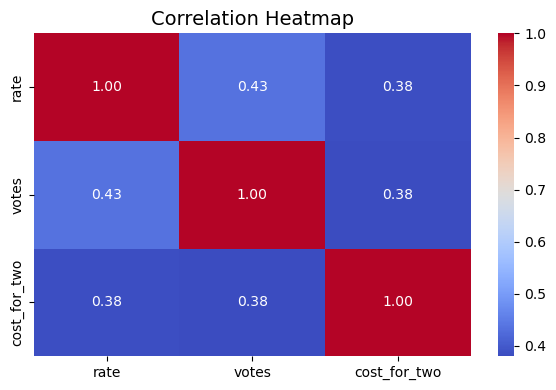

In [69]:
import seaborn as sns
numeric_cols = ['rate', 'votes', 'cost_for_two']

plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()
